**Update**
2nd version 15:50 Sep,24th Zichun Wang
I found that GOOG started at about 2004. So, I changed my idea, and started to retrive data from 2010-09-24. Please check the ebw data on the GOOG_ver2.xlsx
And, I update two xlsx files which contain First_order_difference data for BAC and GOOG, respectively.


3rd version 20:14 Sep,24th Zichun Wang
I split the data into two parts, training set and testing set.
I only plot FOA of the training sets. 

**Tips**

**Main steps:**
1: read data BAC from 2000-09-24 to 2020-09-24, and, read data GOOG from 2010-09-24 to 2020-09-24.

2: preprocession
In the step 2, we should have a basic impression on the whole data set.
i: plot the data(open and close)
ii: log2, and then plot them.
iii:then use first_order_difference on open and close. Call fillna to eliminate NA values

3: data split
 split the data, using the first 75% part as the training data, the last 25% part as the experiment data.

4:first_order_difference observation:
plot first order difference of log2(open) and log2(closed) price (pf the training sets.)

5: Other operations(this file is unfinished...)

**1:read data:**

In [1]:
#import necessary libraries
import qntutl1 as q
import numpy as np
#Each time you want to create a new project, you need to rename the qntutl1.py file.


In [2]:
BAC = q.get_data('BAC','2000-9-24','2019-9-24')
print(BAC.head(1))
print(BAC.tail(1))
BAC.to_excel("BAC_ver1.xlsx")

[*********************100%***********************]  1 of 1 completed
                Open      High     Low  Close  Adj Close   Volume Source
Date                                                                    
2000-09-25  27.59375  28.09375  27.375   27.5  16.507301  8120600  Yahoo
                 Open       High    Low  Close  Adj Close    Volume Source
Date                                                                      
2019-09-23  29.309999  29.620001  29.17  29.52  28.771095  52048300  Yahoo


In [3]:
GOOG = q.get_data('GOOG','2009-9-24','2019-9-24')
print(GOOG.head(1))
print(GOOG.tail(1))
GOOG.to_excel("GOOG_ver2.xlsx")

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-09-24  249.300568  249.768799  245.579514  247.457474  247.457474   

             Volume Source  
Date                        
2009-09-24  5074000  Yahoo  
              Open         High          Low        Close    Adj Close  \
Date                                                                     
2019-09-23  1226.0  1239.089966  1224.170044  1234.030029  1234.030029   

             Volume Source  
Date                        
2019-09-23  1062400  Yahoo  


**2: preprocession**

**2(i)**
plot the data, open and close of BAC and GOOG. x-axis is date, y-axis is price.

First, open and close of BAC.

Text(0, 0.5, 'Open price of BAC')

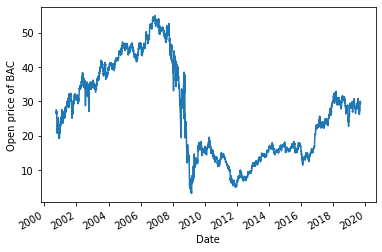

In [8]:
import matplotlib.pyplot as plt
BAC.Open.plot()
plt.ylabel("Open price of BAC")

Text(0, 0.5, 'Close price of BAC')

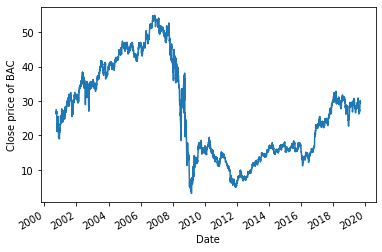

In [9]:
BAC.Close.plot()
plt.ylabel("Close price of BAC")

Then, open and close for GOOG.

Text(0, 0.5, 'Open price of GOOG')

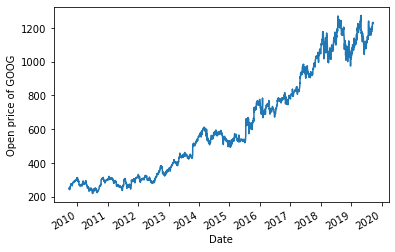

In [10]:
GOOG.Open.plot()
plt.ylabel("Open price of GOOG")

Text(0, 0.5, 'Close price of GOOG')

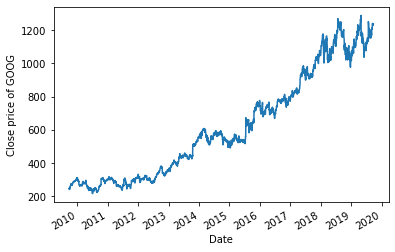

In [11]:
GOOG.Close.plot()
plt.ylabel("Close price of GOOG")

**2(ii)**:log open and close price. PLot them in the sequence: log2(open(BAC)),log2(close(BAC)),log2(open(GOOG)),log2(close(GOOG))

In [14]:
import numpy as np
BAC['Open_log2']=np.log2(BAC['Open'])
BAC['Close_log2']=np.log2(BAC['Close'])
GOOG['Open_log2']=np.log2(GOOG['Open'])
GOOG['Close_log2']=np.log2(GOOG['Close'])
#print(GOOG.head(1))
#print(GOOG.tail(1))
#print(BAC.head(1))
#print(BAC.tail(1))

Text(0, 0.5, 'Open price for log2(BAC):')

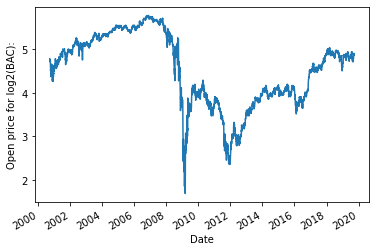

In [15]:
BAC.Open_log2.plot()
plt.ylabel("Open price for log2(BAC):")

Text(0, 0.5, 'Close price for log2(BAC):')

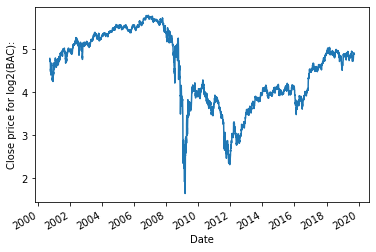

In [16]:
BAC.Close_log2.plot()
plt.ylabel("Close price for log2(BAC):")

Text(0, 0.5, 'Open price for log2(GOOG):')

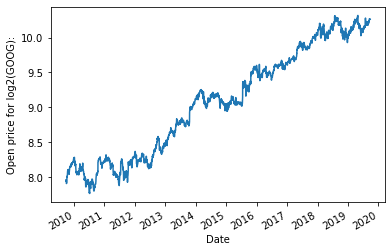

In [17]:
GOOG.Open_log2.plot()
plt.ylabel("Open price for log2(GOOG):")

Text(0, 0.5, 'Close price for log2(GOOG):')

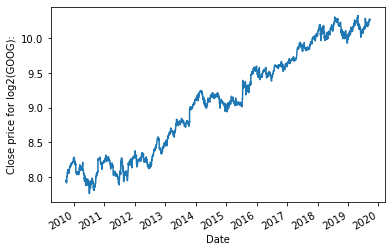

In [18]:
GOOG.Close_log2.plot()
plt.ylabel("Close price for log2(GOOG):")

get their first_order_difference, i.e., **FOA** ,and plot them.

**2(iii)**:
Calculate first_order_difference on open and close. Then plot them in the sequence:
og2(open(BAC)),log2(close(BAC)),log2(open(GOOG)),log2(close(GOOG))

In [20]:
BAC['Open_log2_diff']=BAC['Open_log2'].diff()
BAC['Close_log2_diff']=BAC['Close_log2'].diff()
GOOG['Open_log2_diff']=GOOG['Open_log2'].diff()
GOOG['Close_log2_diff']=GOOG['Close_log2'].diff()
#print(BAC.head(1))
#print(BAC.tail(1))
#print(GOOG.head(1))
#print(GOOG.tail(1))

In [22]:
BAC['Open_log2_diff']=BAC['Open_log2_diff'].fillna(0)
BAC['Close_log2_diff']=BAC['Close_log2_diff'].fillna(0)
GOOG['Open_log2_diff']=GOOG['Open_log2_diff'].fillna(0)
GOOG['Close_log2_diff']=GOOG['Close_log2_diff'].fillna(0)
#print(BAC.head(1))
#print(GOOG.head(1))

**3 split the data.**
75% as the training set,25% as the testing set.

In [26]:
BAC_length = BAC.shape[0]
BAC_split = int(BAC_length * 0.75)
GOOG_length = GOOG.shape[0]
GOOG_split = int(GOOG_length * 0.75)
print(BAC_length)
print(GOOG_length)
print(BAC_split)
print(GOOG_split)

4778
2516
3583
1887


So, we use first 3583 entries of BAC and 1887 entries of GOOG as the training set.
And then, we use last (4778-3583)entries of BAC and (2516-1887)entries of GOOG as the testing set.

In [37]:
# Splitiing the BAC and GOOG into train and test datasets

BAC_train, BAC_test = BAC.head(BAC_split), BAC.tail(BAC_length-BAC_split)
GOOG_train, GOOG_test = GOOG.head(GOOG_split), GOOG.tail(GOOG_length-GOOG_split)
# Print the size of the train and test dataset
print(BAC_train.shape[0], BAC_test.shape[0]," are training sets and testing sets of BAC, respectively.")
print(GOOG_train.shape[0], GOOG_test.shape[0]," are training sets and testing sets of GOOG respectively.")

3583 1195  are training sets and testing sets of BAC, respectively.
1887 629  are training sets and testing sets of GOOG respectively.


**4:first_order_difference observation:**
 plot first order difference of log2(open) and log2(closed) price (of the training sets).

First, BAC:

In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'log2_FOA of BAC_open(training set) :')

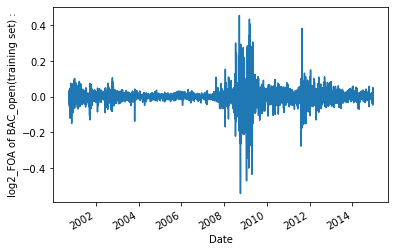

In [29]:
BAC_train.Open_log2_diff.plot()
plt.ylabel('log2_FOA of BAC_open(training set) :')
#BAC.to_excel("BAC_FOA_ver1.xlsx")

Text(0, 0.5, 'log2_FOA of BAC_close(training set) :')

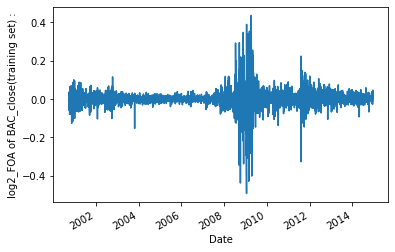

In [30]:
BAC_train.Close_log2_diff.plot()
plt.ylabel('log2_FOA of BAC_close(training set) :')

Second, GOOG:

Text(0, 0.5, 'log2_FOA of GOOG_open:(training set) :')

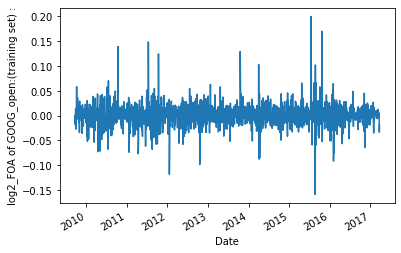

In [31]:
GOOG_train.Open_log2_diff.plot()
plt.ylabel('log2_FOA of GOOG_open:(training set) :')

Text(0, 0.5, 'log2_FOA of GOOG_close:(training set) ')

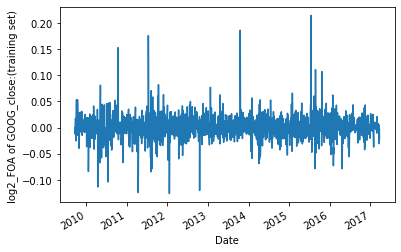

In [32]:
GOOG_train.Close_log2_diff.plot()
plt.ylabel('log2_FOA of GOOG_close:(training set) ')

In [43]:
#a makeshift cell:
#You should delete this one:
#GOOG.to_excel("GOOG_FOA_ver1.xlsx")

**5 other operations**
It seems that we need to check the staionarity:(to be constructed...
:)

**X gidgets**

Tips:
call fillna to eliminate NA values
reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [39]:
GOOG_train.to_excel("GOOG_train_ver1.xlsx")
GOOG_test.to_excel("GOOG_test_ver1.xlsx")
BAC_train.to_excel("BAC_train_ver1.xlsx")
BAC_test.to_excel("BAC_test_ver1.xlsx")